In [1]:
%matplotlib widget
from BIOViewer import EventViewer
from BIOViewer.config import EventConfig
import os
from local_utils import cut_and_jitter,EDFLoader
from trash import StandardFilter
import numpy as np

In [2]:
class npLoader():
    def __init__(self):
        pass
    def load_signal(self,path_signal):
        return np.load(path_signal)
loader = npLoader()

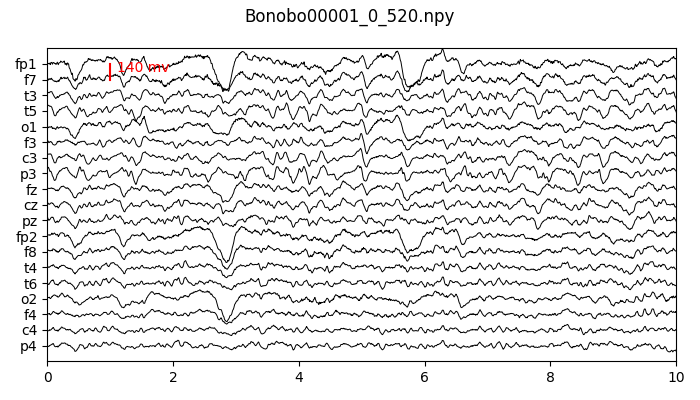

In [3]:
channels = ['fp1', 'f7', 't3', 't5', 'o1', 'f3', 'c3', 'p3', 'fz', 'cz', 'pz', 'fp2', 'f8', 't4', 't6', 'o2', 'f4', 'c4', 'p4']
Fs = 128
format = 'npy'
if format =='edf':
    path_folder = '/media/moritz/Expansion/Data/Spikes_clemson/Data/HEP_data_10s_segments'
    filter = StandardFilter(Fs,notch_freq=60,band_low=0.5,band_high=60)
    loader = EDFLoader(storage_channels=channels,Fs=Fs)

elif format =='npy':
    path_folder = '/media/moritz/Expansion/Data/bonobo/raw/cluster_center'
    loader = npLoader()
files = [ f for f in os.listdir(path_folder) if f.split('.')[-1]==format]


cutter = cut_and_jitter(windowsize=10,max_offset=0,Fq=128)
transforms = cutter
path_files = [os.path.join(path_folder,f) for f in files]


signalconfig = EventConfig(path_files,loader,Fs,channels,scale= 140,unit='mv',transforms=transforms)
viewer = EventViewer(signal_configs=[signalconfig],windowsize=10,path_save='Figures',title=files)

In [54]:
files

[]